## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('사교육비조사.csv', encoding='cp949')
dataset.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [3]:
dataset.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [4]:
filt = dataset['학교급구분코드'] == 3
dataset = dataset[filt]
dataset.shape # row, column

(30052, 17)

In [5]:
dataset.drop(columns='학교급구분코드', inplace=True)
dataset

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [6]:
dataset.drop(columns = ['지역구분코드', '행정구역시도코드'], inplace=True)
dataset

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [7]:
label = dataset['방과후학교참여여부']
label.unique()

array([1, 2], dtype=int64)

In [8]:
ohe_df = pd.get_dummies(label).astype(int)
ohe_df

,1,2
4920,1,0
4921,1,0
4922,1,0
4923,1,0
4924,1,0
...,...,...
75678,0,1
75679,0,1
75680,0,1
75681,0,1


In [9]:
dataset['방과후학교_참여'] = ohe_df.iloc[:, :-1]
dataset['방과후학교_미참여'] = ohe_df.iloc[:, -1]
dataset

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,방과후학교_미참여
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [10]:
filt = dataset['EBS교재비'] == 0
dataset[filt].count()

방과후학교참여여부       18123
방과후학교참여시간수      18123
EBS교재비          18123
사교육참여시간수        18123
일반교과사교육시간수      18123
예체능사교육시간수       18123
사교육비총비용         18123
총자녀수            18123
학생성적구분코드        18123
부_교육정도코드        17068
모_교육정도코드        17434
부모경제활동코드        18043
월평균가구소득코드       18123
진학희망고등학교유형코드        0
방과후학교_참여        18123
방과후학교_미참여       18123
dtype: int64

In [11]:
dataset.drop(columns = 'EBS교재비', inplace=True)
dataset

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,방과후학교_미참여
4920,1,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,1,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,2,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,2,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,2,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

In [12]:
code = dataset['학생성적구분코드']

In [13]:
code_1 = dataset.loc[code==1, '사교육비총비용']
code_2 = dataset.loc[code==2, '사교육비총비용']
code_3 = dataset.loc[code==3, '사교육비총비용']
code_4 = dataset.loc[code==4, '사교육비총비용']
code_5 = dataset.loc[code==5, '사교육비총비용']

code_2.describe()

count    6079.000000
mean      497.910319
std       501.252365
min         0.000000
25%         0.000000
50%       428.875186
75%       784.472142
max      4873.236036
Name: 사교육비총비용, dtype: float64

In [14]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False 

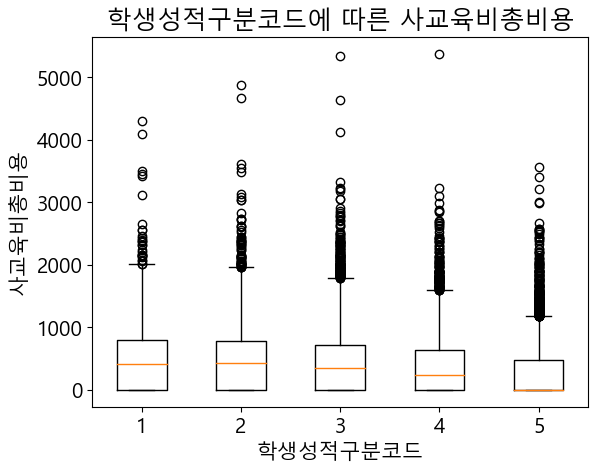

In [15]:
fig, ax = plt.subplots()
ax.boxplot([code_1, code_2, code_3, code_4, code_5])
plt.title('학생성적구분코드에 따른 사교육비총비용')
plt.xlabel('학생성적구분코드')
plt.ylabel('사교육비총비용')
plt.show()

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

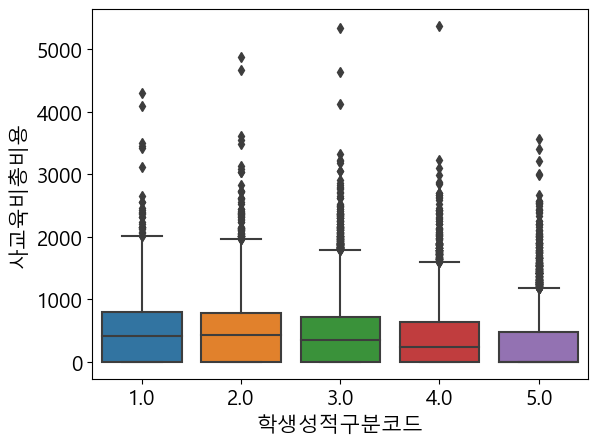

In [16]:
sns.boxplot(y='사교육비총비용', x='학생성적구분코드', data=dataset)

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [17]:
dataset['학생성적구분코드'].value_counts(dropna=False) # 결측치 확인

학생성적구분코드
3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: count, dtype: int64

In [18]:
dataset['학생성적구분코드'] = dataset['학생성적구분코드'].astype('str')
dataset['학생성적구분코드'] = dataset['학생성적구분코드'].replace({'1.0':'상위', '2.0':'상위', '4.0':'하위', '5.0':'하위'})
dataset['학생성적구분코드']

4920      상위
4921     3.0
4922      하위
4923      하위
4924      하위
        ... 
75678     하위
75679     하위
75680     하위
75681     상위
75682     상위
Name: 학생성적구분코드, Length: 30052, dtype: object

In [19]:
label = dataset['학생성적구분코드']
label.values.reshape(-1,1)

array([['상위'],
       ['3.0'],
       ['하위'],
       ...,
       ['하위'],
       ['상위'],
       ['상위']], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(label.values.reshape(-1,1))

<30052x3 sparse matrix of type '<class 'numpy.float64'>'
	with 30052 stored elements in Compressed Sparse Row format>

In [21]:
ohe.categories_

[array(['3.0', '상위', '하위'], dtype=object)]

In [22]:
ohe_onehot_encoded = ohe.fit_transform(label.values.reshape(-1,1))
ohe_label = ohe_onehot_encoded.toarray()
ohe_df = pd.DataFrame(ohe_label, columns=['학교성적구분_3.0', '학교성적구분_상위', '학교성적구분_하위'])

ohe_df.index = dataset.index
ohe_df

,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,0.0,1.0,0.0
4921,1.0,0.0,0.0
4922,0.0,0.0,1.0
4923,0.0,0.0,1.0
4924,0.0,0.0,1.0
...,...,...,...
75678,0.0,0.0,1.0
75679,0.0,0.0,1.0
75680,0.0,0.0,1.0
75681,0.0,1.0,0.0


In [23]:
dataset = pd.concat([dataset, ohe_df], axis=1)
dataset

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,방과후학교_미참여,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,1,0.333333,0.0,0.0,0.0,0.000000,1,상위,71.0,61.0,2.0,4,NaN,1,0,0.0,1.0,0.0
4921,1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,1.0,0.0,0.0
4922,1,0.333333,0.0,0.0,0.0,0.000000,2,하위,31.0,41.0,3.0,4,NaN,1,0,0.0,0.0,1.0
4923,1,0.333333,0.0,0.0,0.0,0.000000,2,하위,51.0,51.0,3.0,1,NaN,1,0,0.0,0.0,1.0
4924,1,0.333333,12.0,12.0,0.0,2203.395453,2,하위,71.0,62.0,1.0,8,NaN,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,0.0,0.0,0.0,0.000000,1,하위,51.0,31.0,3.0,4,NaN,0,1,0.0,0.0,1.0
75679,2,0.000000,0.0,0.0,0.0,0.000000,4,하위,41.0,31.0,3.0,6,NaN,0,1,0.0,0.0,1.0
75680,2,0.000000,0.0,0.0,0.0,105.000000,3,하위,51.0,51.0,3.0,8,NaN,0,1,0.0,0.0,1.0
75681,2,0.000000,0.0,0.0,0.0,112.500000,2,상위,51.0,63.0,3.0,5,NaN,0,1,0.0,1.0,0.0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A:레이블인코딩은 범주형 데이터를 연속적인 숫자로 일대일 매핑해주는 방식으로 가까운 숫자를 비슷한 데이터로 판단하는 단점이 있습니다. 원-핫 인코딩은 범주형 데이터의 고윳값 개수만큼 열을 추가하여 고윳값에 해당하는 열에 1을 표시하고 나머지 열에는 0을 표시하는 방식으로 레이블 인코딩의 문제를 해결할 수 있습니다. 고윳값이 많으면 그만큼 열 개수와 메모리 사용량이 늘어나기 때문에 모델 훈련 속도가 느려진다는 단점이 있습니다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [24]:
dataset = dataset.drop(columns = ['방과후학교참여여부','학생성적구분코드']) # 기존 변수 삭제
dataset

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,방과후학교_미참여,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,0.0,1.0,0.0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,1.0,0.0,0.0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0.0,0.0,1.0
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0.0,0.0,1.0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0.0,0.0,1.0
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0.0,0.0,1.0
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0.0,0.0,1.0
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,0.0,1.0,0.0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:다중공선성이란 독립변수와 종속변수간의 선형성을 파악할 때 독립변수 간 강한상관관계가 나타나는 문제이다. 원-핫 인코딩에서 dummy variable을 고윳값 개수만큼 생성하게 된다. 즉, 독립변수의 개수가 증가하여 독립변수들 간의 상관 관계를 높이는 문제를 야기한다. dummy variable이 생성되어 다중공선성 문제가 발생하게 된다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [25]:
co1 = dataset['사교육참여시간수'].isna() # 결측치 확인
co2 = dataset['일반교과사교육시간수'].isna() # 결측치 확인
co3 = dataset['예체능사교육시간수'].isna() # 결측치 확인
co1.unique() ,co2.unique() ,co3.unique()

(array([False]), array([False]), array([False]))

In [26]:
columns = ['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']
columns

['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']

In [27]:
dataset_corr = dataset[columns].corr()
dataset_corr

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


<Axes: >

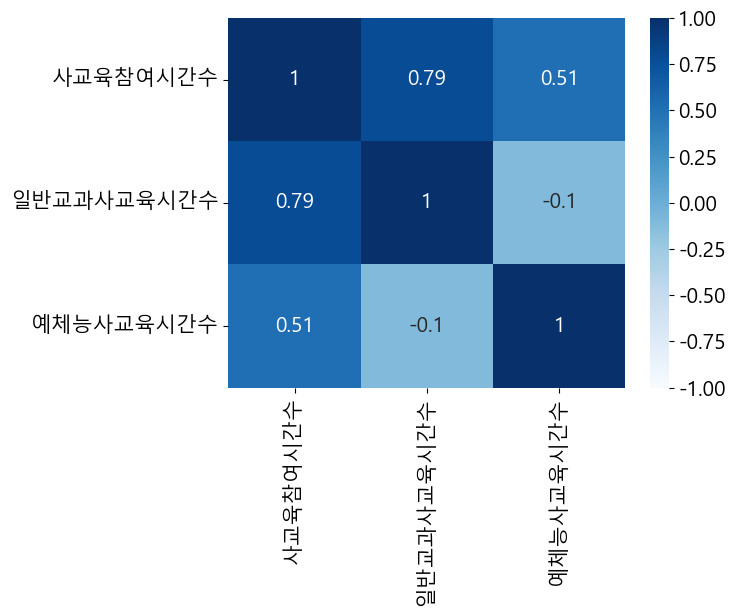

In [28]:
hm = sns.heatmap(dataset_corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
hm

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [29]:
dataset

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,방과후학교_미참여,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,0.0,1.0,0.0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,1.0,0.0,0.0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0.0,0.0,1.0
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0.0,0.0,1.0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0.0,0.0,1.0
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0.0,0.0,1.0
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0.0,0.0,1.0
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,0.0,1.0,0.0


In [30]:
dataset['진학희망고등학교유형코드'].value_counts(dropna=False)

진학희망고등학교유형코드
NaN    30052
Name: count, dtype: int64

In [31]:
dataset = dataset.drop(columns='진학희망고등학교유형코드')
dataset

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교_참여,방과후학교_미참여,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,0.0,1.0,0.0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,1.0,0.0,0.0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0.0,0.0,1.0
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0.0,0.0,1.0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,0,1,0.0,0.0,1.0
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,0,1,0.0,0.0,1.0
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,0,1,0.0,0.0,1.0
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,0,1,0.0,1.0,0.0


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30052 entries, 4920 to 75682
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방과후학교참여시간수  30052 non-null  float64
 1   사교육참여시간수    30052 non-null  float64
 2   일반교과사교육시간수  30052 non-null  float64
 3   예체능사교육시간수   30052 non-null  float64
 4   사교육비총비용     30052 non-null  float64
 5   총자녀수        30052 non-null  int64  
 6   부_교육정도코드    28483 non-null  float64
 7   모_교육정도코드    29074 non-null  float64
 8   부모경제활동코드    29947 non-null  float64
 9   월평균가구소득코드   30052 non-null  int64  
 10  방과후학교_참여    30052 non-null  int32  
 11  방과후학교_미참여   30052 non-null  int32  
 12  학교성적구분_3.0  30052 non-null  float64
 13  학교성적구분_상위   30052 non-null  float64
 14  학교성적구분_하위   30052 non-null  float64
dtypes: float64(11), int32(2), int64(2)
memory usage: 3.4 MB


## 전체 데이터에서 결측치가 있는 행 제거

In [34]:
dataset = dataset.dropna()
dataset.reset_index()
dataset

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교_참여,방과후학교_미참여,학교성적구분_3.0,학교성적구분_상위,학교성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,0.0,1.0,0.0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,1.0,0.0,0.0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0.0,0.0,1.0
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0.0,0.0,1.0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75677,0.000000,8.0,8.0,0.0,413.136647,2,51.0,51.0,3.0,8,0,1,0.0,0.0,1.0
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,0,1,0.0,0.0,1.0
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,0,1,0.0,0.0,1.0
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,0,1,0.0,0.0,1.0


In [66]:
import statsmodels.api as sm

dataset['intercept'] = 1
model = sm.OLS(dataset['사교육비총비용'], dataset[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '총자녀수', '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '방과후학교_참여', '방과후학교_미참여', '학교성적구분_상위', '학교성적구분_하위']])

results = model.fit()
results.summary()

C:\Users\leeji\AppData\Local\Temp\ipykernel_40900\3295508445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                사교육비총비용   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     4036.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:02:37   Log-Likelihood:            -1.9701e+05
No. Observations:               27610   AIC:                         3.940e+05
Df Residuals:                   27598   BIC:                         3.941e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
사교육참여시간수      35.9202      2.062     17.420      0.000      31.879      39.962
일반교과사교육시간수    24.1928      2.080     11.633      0.000      20.117      28.269
예체능사교육시간수     -2.8014      2.132     -1.314      0.189      -6.981       1.378
총자녀수         -27.8216      2.789     -9.976      0.000     -33.288     -22.356
부_교육정도코드       2.4602      0.201     12.245      0.000       2.066       2.854
모_교육정도코드       1.7200      0.217      7.923      0.000       1.295       2.146
부모경제활동코드     -17.2550      1.990     -8.669      0.000     -21.156     -13.354
월평균가구소득코드     29.8094      0.963     30.952      0.000      27.922      31.697
방과후학교_참여     -94.3927     12.419     -7.600      0.000    -118.735     -70.050
방과후학교_미참여    -67.6895     12.527     -5.404      0.000     -92.243     -43.136
학교성적구분_상위     -3.3487      4.702     -0.712      0.476     -12.564       5.867
학교성적구분_하위    -23.1610      4.520     -5.124      0.000     -32.020     -14.302
==============================================================================
Omnibus:                    10639.022   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153224.827
Skew:                           1.457   Prob(JB):                         0.00
Kurtosis:                      14.167   Cond. No.                         608.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 예체능사교육시간수는 t 검정을 통해 유의미하지 않기 때문에 제거

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train =dataset[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '총자녀수', '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '방과후학교_참여', '방과후학교_미참여', '학교성적구분_상위', '학교성적구분_하위']]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
vif

,VIF_Factor,Feature
0,54.640300,사교육참여시간수
1,41.103282,일반교과사교육시간수
2,20.580119,예체능사교육시간수
3,1.023827,총자녀수
4,1.632388,부_교육정도코드
5,1.608016,모_교육정도코드
6,1.016350,부모경제활동코드
7,1.180738,월평균가구소득코드
8,28.497884,방과후학교_참여
9,17.918783,방과후학교_미참여


## VIF 값이 10 이상인 변수 제거 후 VIF 값 산출

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train =dataset[['사교육참여시간수', '일반교과사교육시간수', '총자녀수', '부모경제활동코드', '월평균가구소득코드', '방과후학교_미참여', '학교성적구분_상위', '학교성적구분_하위']]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
vif

,VIF_Factor,Feature
0,4.931450,사교육참여시간수
1,4.680528,일반교과사교육시간수
2,6.632085,총자녀수
3,5.931181,부모경제활동코드
4,5.511952,월평균가구소득코드
5,1.682436,방과후학교_미참여
6,1.940552,학교성적구분_상위
7,2.190091,학교성적구분_하위


In [69]:
import statsmodels.api as sm

dataset['intercept'] = 1
model = sm.OLS(dataset['사교육비총비용'], dataset[['사교육참여시간수', '일반교과사교육시간수', '총자녀수', '부모경제활동코드', '월평균가구소득코드', '방과후학교_미참여', '학교성적구분_상위', '학교성적구분_하위']])

results = model.fit()
results.summary()

C:\Users\leeji\AppData\Local\Temp\ipykernel_40900\3361029353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                사교육비총비용   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                          1.243e+04
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:03:46   Log-Likelihood:                     -1.9726e+05
No. Observations:               27610   AIC:                                  3.945e+05
Df Residuals:                   27602   BIC:                                  3.946e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
사교육참여시간수      33.5085      0.471     71.144      0.000      32.585      34.432
일반교과사교육시간수    27.6074      0.553     49.880      0.000      26.523      28.692
총자녀수         -19.2551      2.104     -9.151      0.000     -23.380     -15.131
부모경제활동코드     -13.6116      1.749     -7.784      0.000     -17.039     -10.184
월평균가구소득코드     39.0942      0.838     46.645      0.000      37.451      40.737
방과후학교_미참여     30.5622      3.873      7.891      0.000      22.971      38.153
학교성적구분_상위     12.4214      4.585      2.709      0.007       3.435      21.408
학교성적구분_하위    -18.2389      4.409     -4.136      0.000     -26.882      -9.596
==============================================================================
Omnibus:                    10648.904   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156780.043
Skew:                           1.452   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                         35.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""